# One option model

In [1]:
from prayas import *

The experiment consists of multiple variants and in each variant the visitor has only one option to choose. A detailed explanation of the methodology is available in *[Bayesian A/B Testing for Business Decisions](https://arxiv.org/abs/2003.02769)* by Shafi Kamalbasha and Manuel J. A. Eugster (2020).

Setup the model and define the four variants:

In [2]:
m = OneOptionModel(["Discount 20", "Discount 10",  
                    "Discount 40", "Discount 50"],
                   baseline = "Discount 20")

The full model specification is:

In [3]:
print(m)

One option model
Variants              : Discount 20, Discount 10, Discount 40, Discount 50
Baseline              : Discount 20
Measures              : conversion
Primary measure       : conversion
Maximum loss threshold: 0.05            


Set the result of the experiment:

In [4]:
m.set_result(successes=[139, 147, 149, 134], 
             trials=[15144, 15176, 14553, 14948])

Investigate the result:

<module 'matplotlib.pyplot' from '/Users/manuel.eugster/Library/anaconda3/envs/prayas/lib/python3.7/site-packages/matplotlib/pyplot.py'>

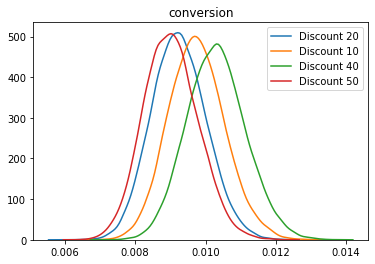

In [5]:
m.plot()

The plot shows the posteriors for the conversion rate based on the underlying one option model. The decision for this experiment is:

In [6]:
m.decision()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss


In this experiment, the variant 'Discount 40' has the hightest probability to be the best with 58%. It is 82% better than the baseline with an uplift of 11%. If we go with 'Discount 40', there is still a change that is not better the baseline and the potential loss is about 1%.

The decision is based on the defined *primary* measure and *maximum acceptable loss*. The default values are `conversion` as the primary measure and `5%` as the maximum acceptable loss. To change the default values, change the parameters of the model in the setup step:

* `m.primary_measure = "..."`
* `m.loss_threshold = "..."`

These two parameters are not part of the decision function but part of the model. This should highlight the fact that the parameters should be defined during the experiment design and setup stage and are not parameters to play around in the analysis stage.

Get more details into the experiment and the decision: 

In [7]:
m.score_baseline()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,Discount 40,conversion,0.58680,0.82210,11.556929,1.199847,14.218063,2.458493
1,Discount 10,conversion,0.25635,0.67435,5.456278,2.605508,8.239963,7.686308
2,Discount 20,conversion,0.09760,0.00000,0.000000,0.000000,2.338771,11.299801
3,Discount 50,conversion,0.05925,0.42015,-2.307649,6.020377,-2.285323,13.011567


The data frame consists of a row for each variant and measure combination. It provides:

1. The probability to be the best variant and the probability to beat the baseline
2. The estimated uplift and potential loss in percentage from the baseline if this variant is put into production
3. The estimated uplift and potential loss in percentage from the best variant if this variant is put into production

The package also provides a function to compute a pairwise scoring between all pairs of variants (and measures):

In [8]:
m.score_pairwise()

,Left,Right,Measure,LeftMeasure,RightMeasure,Uplift,ProbabilityUplift,ProbabilityLoss,Loss,LeftMeasureMaxLoss,Score
0,Discount 40,Discount 50,conversion,0.010238,0.008964,14.072041,0.86920,0.13080,0.835692,0.010153,1223.141839
1,Discount 40,Discount 20,conversion,0.010238,0.009179,11.473542,0.82710,0.17290,1.154266,0.010120,948.976638
2,Discount 10,Discount 50,conversion,0.009686,0.008964,8.077919,0.74440,0.25560,1.970719,0.009495,601.320257
3,Discount 10,Discount 20,conversion,0.009686,0.009179,5.615962,0.68205,0.31795,2.554673,0.009439,383.036673
4,Discount 40,Discount 10,conversion,0.010238,0.009686,5.546112,0.68305,0.31695,2.429496,0.009990,378.827209
5,Discount 20,Discount 50,conversion,0.009179,0.008964,2.331046,0.57395,0.42605,3.814421,0.008828,133.790392


The data frame returns a row for each pair of variants and measure combination. It provides the information on:

1. On average we can expect `LeftMeasure` and `RightMeasure` per trial (depending on the measure this is average conversion, average revenue, average gain, etc.)
2. The probability `ProbabilityUplift` that the left variant is better than the right variant with an uplift of `Uplift`%
3. The risk of going with the left variant is a maximum drop of `Loss`% with a probability of `ProbabilityLoss`, resulting in an average of `LeftMeasureMaxLoss` per trial.
4. A score based on `Uplift * ProbabilityUplift`

For example, the first row tells us that for 'Discount 40' we can expect a 1% and for 'Discount 50' a 0.9% conversion rate per visitor. There is 87% probability that 'Discount 40' is 14.2% better than 'Discount 50'. The risk of going with 'Discount 40' is a maximum drop of 83.4% with a probability of 12.9%, resulting in an averge loss of 0.01 conversions per trial.